In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('week2.csv')

# Converting Date column to datetime64
df['Date'] = pd.to_datetime(df['Date'])


In [2]:
df.set_index('Date',inplace=True)

/home/akshatchauhan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


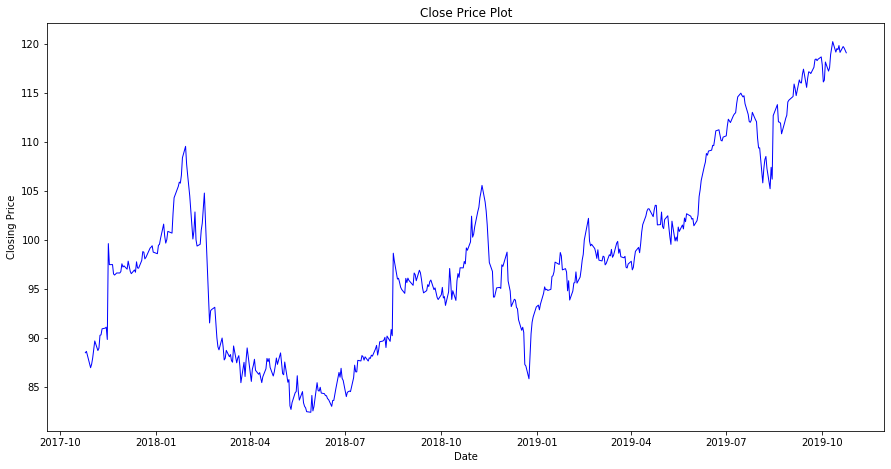

In [3]:
# 2.1 Plotting Close Price and Date
plt.rcParams["figure.figsize"]=15,7.5
plt.plot(df.index,df['Close Price'],'b',linewidth=1)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Close Price Plot')
plt.show()


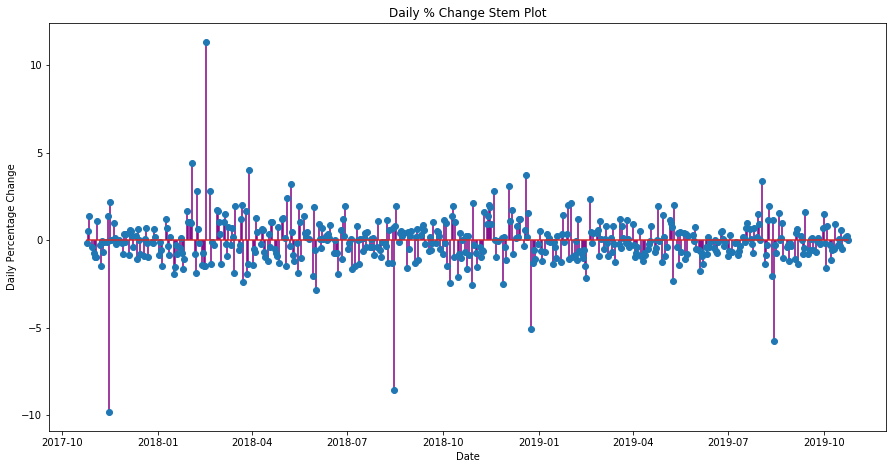

In [4]:
# 2.2 Plotting daily percentage change as stem plot
plt.stem(df.index,df['Day_Perc_Change'],'purple',use_line_collection=True)
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change')
plt.title('Daily % Change Stem Plot')
plt.show()

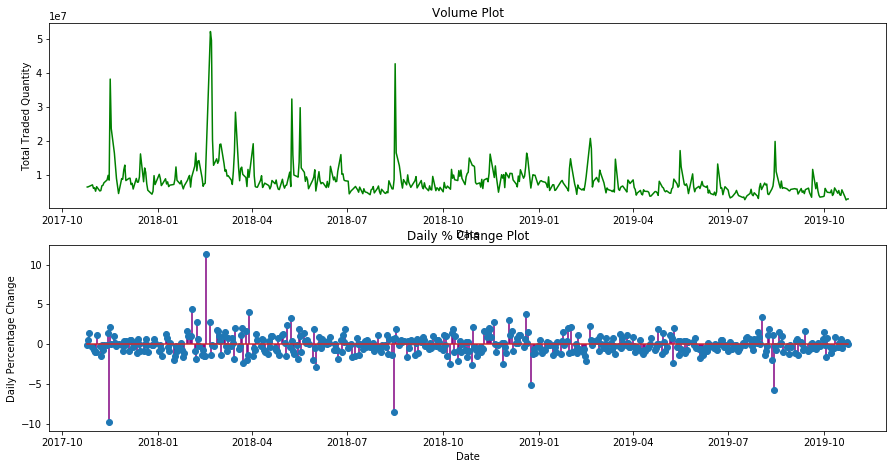

In [5]:
# 2.2 Plotting daily percentage change as stem plot
plt.rcParams["figure.figsize"]=15,7.5

plt.subplot(211)
plt.plot(df.index,df['Total Traded Quantity'],'green')
plt.xlabel('Date')
plt.ylabel('Total Traded Quantity')
plt.title('Volume Plot')


plt.subplot(212)
plt.stem(df.index,df['Day_Perc_Change'],'purple',use_line_collection=True)
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change')
plt.title('Daily % Change Plot')
plt.show()

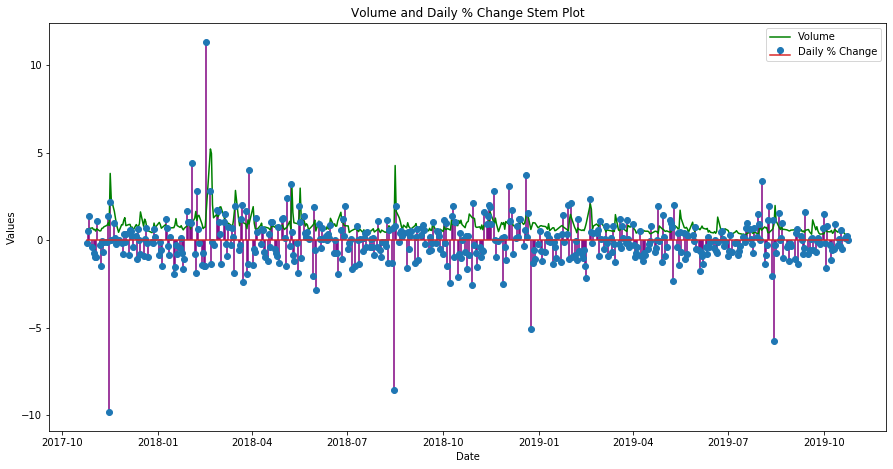

In [6]:
# Plotting volume change and Daily percentage change in one figure
plt.rcParams["figure.figsize"]=15,7.5
plt.plot(df.index,df['Total Traded Quantity']/10**7,'green',label='Volume')
plt.stem(df.index,df['Day_Perc_Change'],'purple',label='Daily % Change',use_line_collection=True)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Volume and Daily % Change Stem Plot')
plt.legend()

Trend
Among top gainers        6
Among top losers         2
Bear drop                2
Bull run                 1
Negative                71
Positive                69
Slight negative         91
Slight or No change    203
Slight positive         58
Name: Close Price, dtype: int64


Text(0.5, 1.0, 'Pie Plot of Trends')

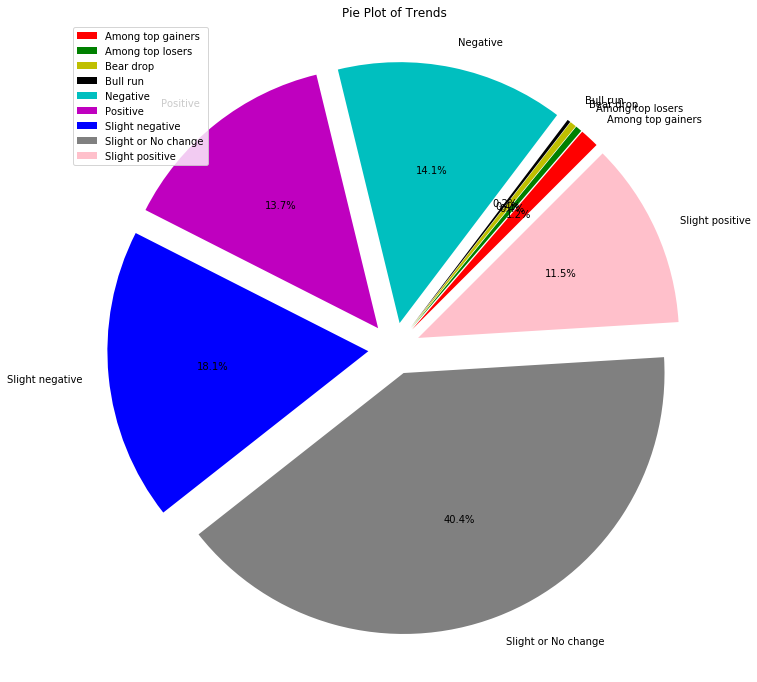

In [7]:
# 2.4 Plotting a pie chart of Trends
plt.rcParams["figure.figsize"]=15,12
x = df.groupby('Trend')['Close Price'].count()
slices = x
items = x.index
print(x)

plt.pie(slices,labels = items.to_list(),colors=['r','g','y','k','c','m','b','gray','pink'],startangle = 45,shadow=False,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),autopct = '%1.1f%%')
plt.legend()
plt.title('Pie Plot of Trends')

Trend
Among top gainers      8.673333e+06
Among top losers       7.710000e+06
Bear drop              8.525000e+06
Bull run               1.606000e+07
Negative               8.801127e+06
Positive               1.079638e+07
Slight negative        7.180330e+06
Slight or No change    7.431084e+06
Slight positive        7.945690e+06
Name: Total Traded Quantity, dtype: float64


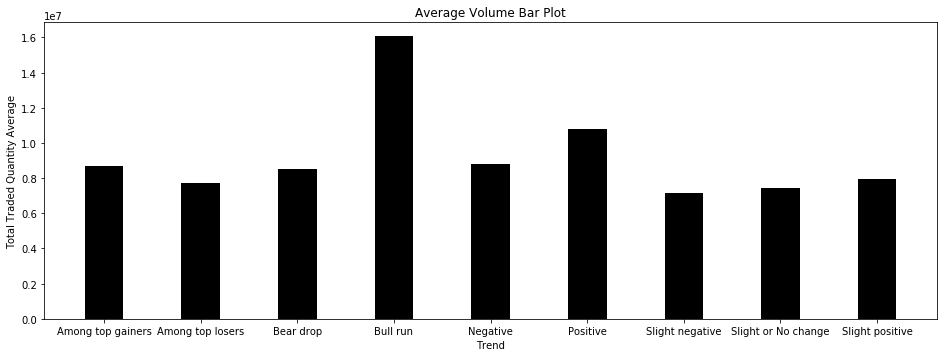

Trend
Among top gainers       9165000
Among top losers        7710000
Bear drop               8525000
Bull run               16059999
Negative                7200000
Positive                9000000
Slight negative         6540000
Slight or No change     6410000
Slight positive         6420000
Name: Total Traded Quantity, dtype: int64


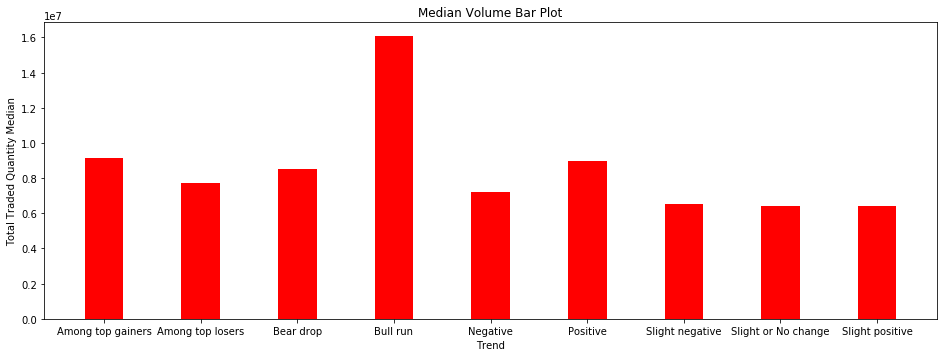

In [8]:
# 2.4 Plotting a bar plot of average and median Total Traded Quantity of each Trend
# Average of Total Traded Quantity
y = df.groupby('Trend')['Total Traded Quantity'].mean()
x_labels = y.index.to_list()
values = y
print(y)
plt.rcParams["figure.figsize"]=16,12
plt.xticks(rotation=45)
plt.subplot(211)
plt.bar(x_labels,values,width=0.4,color='black')
plt.xlabel('Trend')
plt.ylabel('Total Traded Quantity Average')
plt.title('Average Volume Bar Plot')
plt.show()

# Median of Total Traded Quantity
y = df.groupby('Trend')['Total Traded Quantity'].median()
print(y)
plt.subplot(212)
plt.bar(x_labels,y,width=0.4,color='red')
plt.xlabel('Trend')
plt.ylabel('Total Traded Quantity Median')
plt.title('Median Volume Bar Plot')
plt.show()

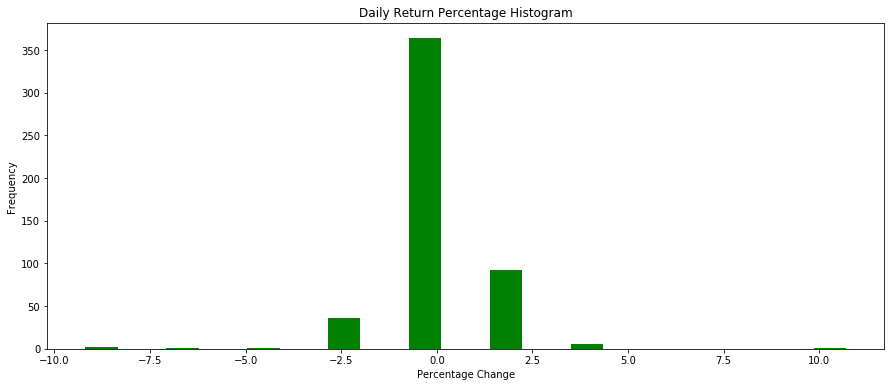

In [9]:
# 2.5 Histogram of Daily Percentage Change in Closing Price
plt.rcParams["figure.figsize"]=15,6
plt.hist(df['Day_Perc_Change'],color='green',rwidth=0.4)
plt.ylabel('Frequency')
plt.xlabel('Percentage Change')
plt.title('Daily Return Percentage Histogram')
plt.show()

In [10]:
# 2.6
# Reading 5 stocks from Mid Cap
df1 = pd.read_csv('Mid_Cap/ADANIPOWER.csv')
df2 = pd.read_csv('Mid_Cap/CASTROLIND.csv')
df3 = pd.read_csv('Mid_Cap/GODREJIND.csv')
df4 = pd.read_csv('Mid_Cap/JINDALSTEL.csv')
df5 = pd.read_csv('Mid_Cap/TATAPOWER.csv')

# Retaining only those rows where Series is equal to 'EQ'
df1 = df1[df1.Series == 'EQ']
df2 = df2[df2.Series == 'EQ']
df3 = df3[df3.Series == 'EQ']
df4 = df4[df4.Series == 'EQ']
df5 = df5[df5.Series == 'EQ']

# Creating a new dataframe that contains only Close Price of each stock
data = {df1.Symbol[0]:df1['Close Price'].to_list(),
        df2.Symbol[0]:df2['Close Price'].to_list(),
        df3.Symbol[0]:df3['Close Price'].to_list(),
        df4.Symbol[0]:df4['Close Price'].to_list(),
        df5.Symbol[0]:df5['Close Price'].to_list(),
       }

dx = pd.DataFrame(data)

# Creating a new dataframe that contains only Percentage Change of Close Price of each stock
data2 = {df1.Symbol[0]+' % Change':df1['Close Price'].pct_change()*100,
         df2.Symbol[0]+' % Change':df2['Close Price'].pct_change()*100,
         df3.Symbol[0]+' % Change':df3['Close Price'].pct_change()*100,
         df4.Symbol[0]+' % Change':df4['Close Price'].pct_change()*100,
         df5.Symbol[0]+' % Change':df5['Close Price'].pct_change()*100,
        }

dp = pd.DataFrame(data2)
# Replacing all NaN values to 0
dp.at[0] = 0

/home/akshatchauhan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/akshatchauhan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


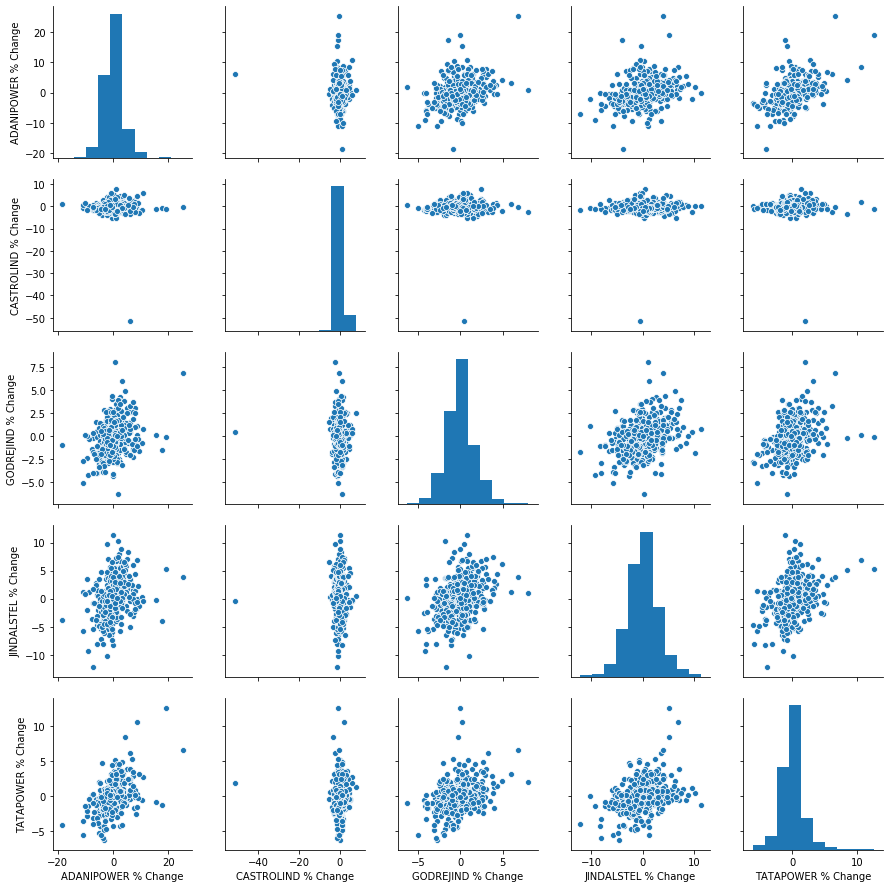

In [11]:
# 2.6 Pair Plot of 5 stocks in Mid Cap
import seaborn as sns
sns.pairplot(dp)

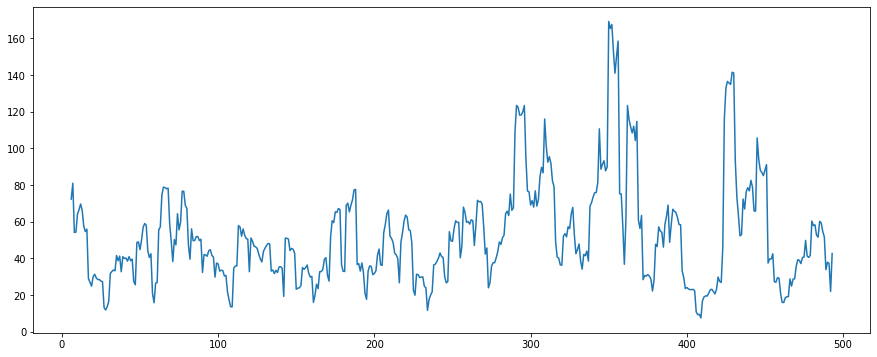

In [12]:
# 2.7 Moving Standard Deviation
# Calculating Moving Standard Deviations and Plotting the graph
rolling_stds = dp['ADANIPOWER % Change'].rolling(window = 7,center = False).std()*np.sqrt(252)
plt.plot(rolling_stds)

Text(0.5, 1.0, 'Volatility - Nifty and Adani Power')

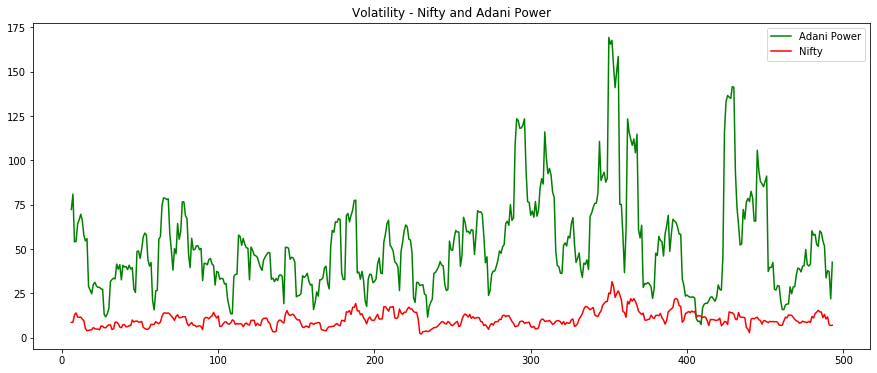

In [13]:
# 2.8 Importing Nifty Dataset
df_nifty = pd.read_csv('Nifty50/Nifty50.csv')

# Calculating Daily Percentage Change in Closing Price
df_nifty['Day_Perc_Change'] = df_nifty['Close'].pct_change()*100
df_nifty.at[0,'Day_Perc_Change'] = 0

# Calculating Moving Standard Deviation
nifty_stds = df_nifty['Day_Perc_Change'].rolling(window = 7,center = False).std()*np.sqrt(252)

# Plotting Moving Standard Deviation of ADANIPOWER and Nifty in one plot
plt.plot(rolling_stds,'g',label='Adani Power',linewidth = 1.5)
plt.plot(nifty_stds,'r',label='Nifty',linewidth = 1.5)
plt.legend()
plt.title('Volatility - Nifty and Adani Power')

In [14]:
# Setting the Date as index in Adani Power dataset
df1['Date'] = pd.to_datetime(df1['Date'],format = '%d-%b-%Y')
df1.set_index('Date',inplace = True)

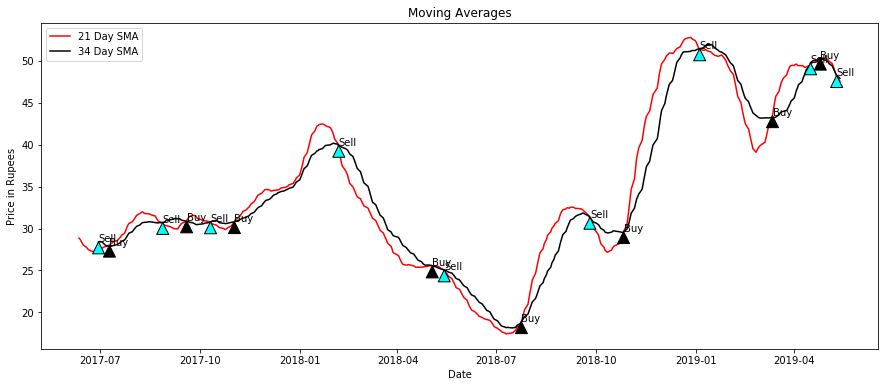

In [21]:
# 2.9 

# 21 Day moving average of Adani Power
mov_avg_21 = df1['Close Price'].rolling(window = 21).mean()
mov_avg_21 = mov_avg_21.to_list()
#mov_avg_21 = [i for i in mov_avg_21 if str(i) != 'nan']
#mov_avg_21

# 34 Day moving average of Adani Power
mov_avg_34 = df1['Close Price'].rolling(window = 34).mean()
mov_avg_34 = mov_avg_34.to_list()
#mov_avg_34 = [i for i in mov_avg_34 if str(i) != 'nan']


ax = plt.subplot(111)
plt.plot(df1.index,mov_avg_21,'red',label='21 Day SMA')
plt.plot(df1.index,mov_avg_34,'black',label='34 Day SMA')
#plt.plot(df1.index,df1['Close Price'],'green',label='Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in Rupees')
plt.title('Moving Averages')

flag = -1
for i in range(len(df1.index)):
    if mov_avg_21[i] != 'nan' and mov_avg_34[i] != 'nan':
        if mov_avg_21[i] > mov_avg_34[i] and (flag == -1 or flag == 0):
            #print(str(df1.index[i])+' : Buy')
            ax.annotate('Buy',xy = (df1.index[i],mov_avg_21[i]),arrowprops=dict(facecolor='black', shrink=0.05))
            flag = 1
        elif mov_avg_21[i] < mov_avg_34[i] and (flag == -1 or flag == 1):
            #print(str(df1.index[i])+' : Sell')
            ax.annotate('Sell',xy = (df1.index[i],mov_avg_34[i]),arrowprops=dict(facecolor='cyan', shrink=0.05))
            flag = 0



Text(0.5, 1.0, 'Bollinder Bands')

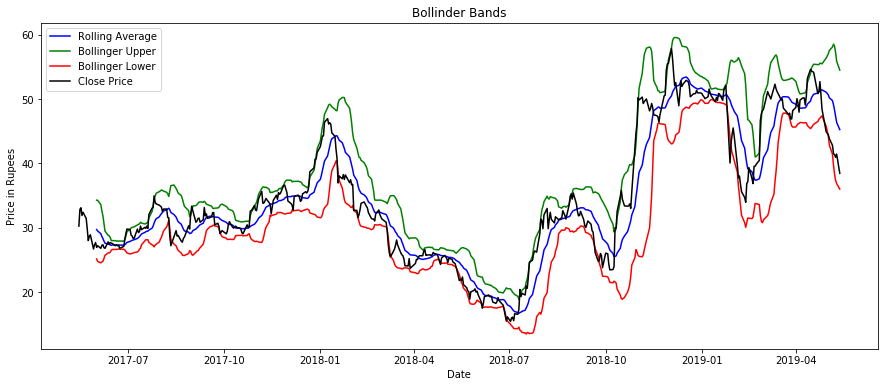

In [16]:
# 2.10 

# Creating values for Bollinger Upper and Lower Bands
Mov_Avg_14 = df1['Close Price'].rolling(window = 14).mean()
Standard_Deviation_14 = df1['Close Price'].rolling(window = 14).std()
Bol_Upper = Mov_Avg_14 + Standard_Deviation_14*2
Bol_Lower = Mov_Avg_14 - Standard_Deviation_14*2

# Plotting all in one graph

plt.plot(df1.index,Mov_Avg_14,'blue',label = 'Rolling Average')
plt.plot(df1.index,Bol_Upper,'green',label = 'Bollinger Upper')
plt.plot(df1.index,Bol_Lower,'red',label = 'Bollinger Lower')
plt.plot(df1.index,df1['Close Price'],'black',label = 'Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in Rupees')
plt.title('Bollinder Bands')

In [17]:
# Saving Adani Power calculated data to a new csv

df1['Bol_Upper'] = Bol_Upper
df1['Bol_Lower'] = Bol_Lower
df1['Mov_Avg_14'] = Mov_Avg_14

df1.to_csv('ADANI_ANALYSIS.csv')